# Billionaires

In [1]:
import pandas as pd
import zipfile
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Define the path to the ZIP file
zip_file_path = 'Billionaires Statistics Dataset.zip'

# Extract and load the CSV file from the ZIP
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    file_name_in_zip = 'Billionaires Statistics Dataset.csv'  # Ensure this matches the file name in the ZIP
    with zip_ref.open(file_name_in_zip) as file:
        data = pd.read_csv(file)

# Data Inspection and Cleaning
print("First few rows of the data:")
display(data.head())

print("\nDataset Information:")
data.info()

print("\nMissing values per column:")
print(data.isnull().sum())

First few rows of the data:


rank  finalWorth               category                personName   age  \
0     1      211000       Fashion & Retail  Bernard Arnault & family  74.0   
1     2      180000             Automotive                 Elon Musk  51.0   
2     3      114000             Technology                Jeff Bezos  59.0   
3     4      107000             Technology             Larry Ellison  78.0   
4     5      106000  Finance & Investments            Warren Buffett  92.0   

         country    city              source             industries  \
0         France   Paris                LVMH       Fashion & Retail   
1  United States  Austin       Tesla, SpaceX             Automotive   
2  United States  Medina              Amazon             Technology   
3  United States   Lanai              Oracle             Technology   
4  United States   Omaha  Berkshire Hathaway  Finance & Investments   

  countryOfCitizenship  ... cpi_change_country           gdp_country  \
0               France  ...                1.1   $2,715,518,274,227    
1        United States  ...                7.5  $21,427,700,000,000    
2        United States  ...                7.5  $21,427,700,000,000    
3        United States  ...                7.5  $21,427,700,000,000    
4        United States  ...                7.5  $21,427,700,000,000    

  gross_tertiary_education_enrollment  \
0                                65.6   
1                                88.2   
2                                88.2   
3                                88.2   
4                                88.2   

  gross_primary_education_enrollment_country life_expectancy_country  \
0                                      102.5                    82.5   
1                                      101.8                    78.5   
2                                      101.8                    78.5   
3                                      101.8                    78.5   
4                                      101.8                    78.5   

  tax_revenue_country_country total_tax_rate_country population_country  \
0                        24.2                   60.7         67059887.0   
1                         9.6                   36.6        328239523.0   
2                         9.6                   36.6        328239523.0   
3                         9.6                   36.6        328239523.0   
4                         9.6                   36.6        328239523.0   

  latitude_country longitude_country  
0        46.227638          2.213749  
1        37.090240        -95.712891  
2        37.090240        -95.712891  
3        37.090240        -95.712891  
4        37.090240        -95.712891  

[5 rows x 35 columns]


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   int64  
 2   category                                    2640 non-null   object 
 3   personName                                  2640 non-null   object 
 4   age                                         2575 non-null   float64
 5   country                                     2602 non-null   object 
 6   city                                        2568 non-null   object 
 7   source                                      2640 non-null   object 
 8   industries                                  2640 non-null   object 
 9   countryOfCitizenship                        2640 non-null   obj

In [3]:
data.describe()

rank     finalWorth          age    birthYear   birthMonth  \
count  2640.000000    2640.000000  2575.000000  2564.000000  2564.000000   
mean   1289.159091    4623.787879    65.140194  1957.183307     5.740250   
std     739.693726    9834.240939    13.258098    13.282516     3.710085   
min       1.000000    1000.000000    18.000000  1921.000000     1.000000   
25%     659.000000    1500.000000    56.000000  1948.000000     2.000000   
50%    1312.000000    2300.000000    65.000000  1957.000000     6.000000   
75%    1905.000000    4200.000000    75.000000  1966.000000     9.000000   
max    2540.000000  211000.000000   101.000000  2004.000000    12.000000   

          birthDay  cpi_country  cpi_change_country  \
count  2564.000000  2456.000000         2456.000000   
mean     12.099844   127.755204            4.364169   
std       9.918876    26.452951            3.623763   
min       1.000000    99.550000           -1.900000   
25%       1.000000   117.240000            1.700000   
50%      11.000000   117.240000            2.900000   
75%      21.000000   125.080000            7.500000   
max      31.000000   288.570000           53.500000   

       gross_tertiary_education_enrollment  \
count                          2458.000000   
mean                             67.225671   
std                              21.343426   
min                               4.000000   
25%                              50.600000   
50%                              65.600000   
75%                              88.200000   
max                             136.600000   

       gross_primary_education_enrollment_country  life_expectancy_country  \
count                                 2459.000000              2458.000000   
mean                                   102.858520                78.122823   
std                                      4.710977                 3.730099   
min                                     84.700000                54.300000   
25%                                    100.200000                77.000000   
50%                                    101.800000                78.500000   
75%                                    102.600000                80.900000   
max                                    142.100000                84.200000   

       tax_revenue_country_country  total_tax_rate_country  \
count                  2457.000000             2458.000000   
mean                     12.546235               43.963344   
std                       5.368625               12.145296   
min                       0.100000                9.900000   
25%                       9.600000               36.600000   
50%                       9.600000               41.200000   
75%                      12.800000               59.100000   
max                      37.200000              106.300000   

       population_country  latitude_country  longitude_country  
count        2.476000e+03       2476.000000        2476.000000  
mean         5.102053e+08         34.903592          12.583156  
std          5.542447e+08         17.003497          86.762989  
min          3.801900e+04        -40.900557        -106.346771  
25%          6.683440e+07         35.861660         -95.712891  
50%          3.282395e+08         37.090240          10.451526  
75%          1.366418e+09         40.463667         104.195397  
max          1.397715e+09         61.924110         174.885971

In [4]:
# Data Cleaning and Preprocessing

In [5]:
# Fill missing values
data['age'].fillna(data['age'].mean(), inplace=True)
data['country'].fillna('Unknown', inplace=True)
data['city'].fillna('Unknown', inplace=True)
data['organization'].fillna('Unknown', inplace=True)
data['title'].fillna('Unknown', inplace=True)

# Clean non-numeric symbols in `finalWorth` and `gdp_country` columns
data['finalWorth'] = pd.to_numeric(data['finalWorth'].replace(r'[\$,]', '', regex=True), errors='coerce')
data['gdp_country'] = pd.to_numeric(data['gdp_country'].replace(r'[\$,]', '', regex=True), errors='coerce')

# Impute remaining values for key columns
country_columns = ['cpi_country', 'gross_tertiary_education_enrollment', 'gross_primary_education_enrollment_country',
                   'life_expectancy_country', 'population_country', 'cpi_change_country', 
                   'tax_revenue_country_country', 'total_tax_rate_country']
for col in country_columns:
    data[col].fillna(data[col].median(), inplace=True)

# Convert `date` and `birthDate` to datetime format
data['date'] = pd.to_datetime(data['date'], errors='coerce')
data['birthDate'] = pd.to_datetime(data['birthDate'], errors='coerce')

# Feature Engineering
data['net_worth_billion'] = data['finalWorth'] / 1000
data['age_group'] = pd.cut(data['age'], bins=[0, 40, 60, 100], labels=["Young", "Middle-Aged", "Senior"])
data['wealth_origin'] = data['selfMade'].apply(lambda x: "Self-Made" if x else "Inherited")

C:\Users\milto\AppData\Local\Temp\ipykernel_25632\909391913.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].mean(), inplace=True)
C:\Users\milto\AppData\Local\Temp\ipykernel_25632\909391913.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

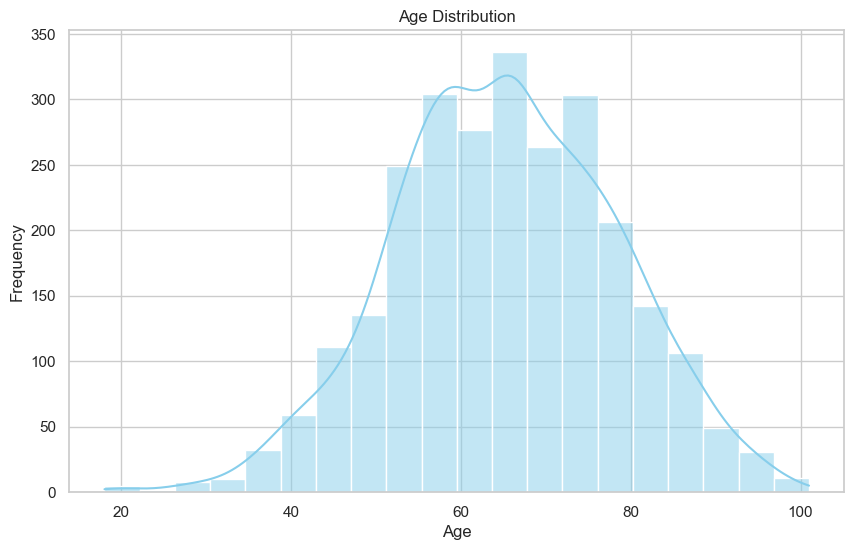

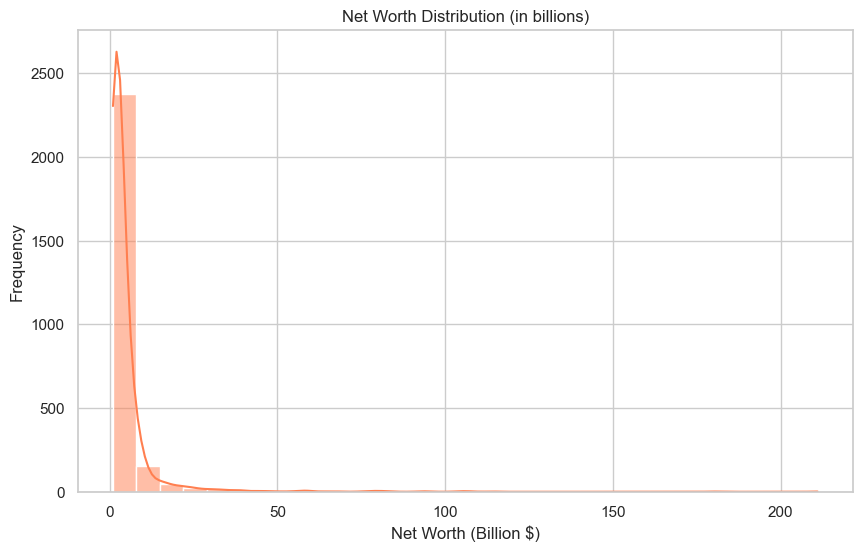

C:\Users\milto\AppData\Local\Temp\ipykernel_25632\1399604143.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['wealth_origin'], palette="muted")


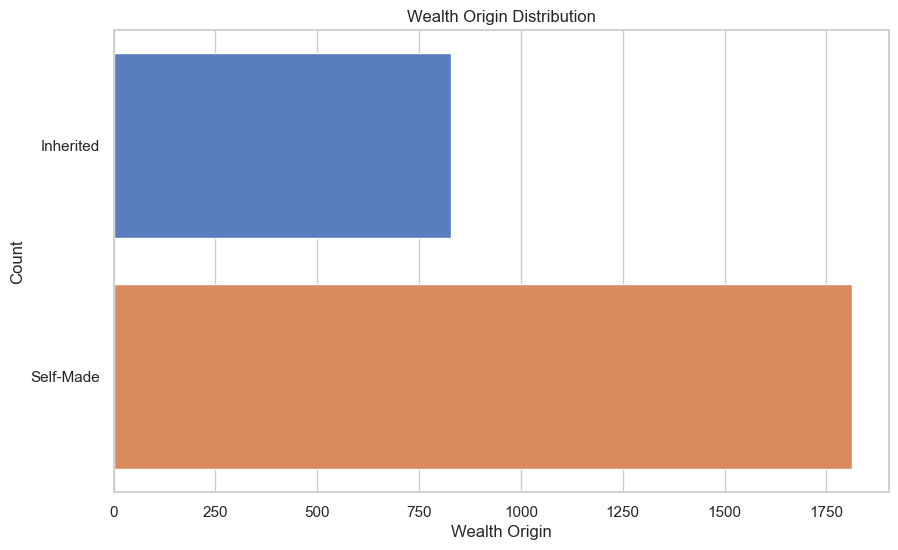

C:\Users\milto\AppData\Local\Temp\ipykernel_25632\1399604143.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['age_group'], palette="muted")


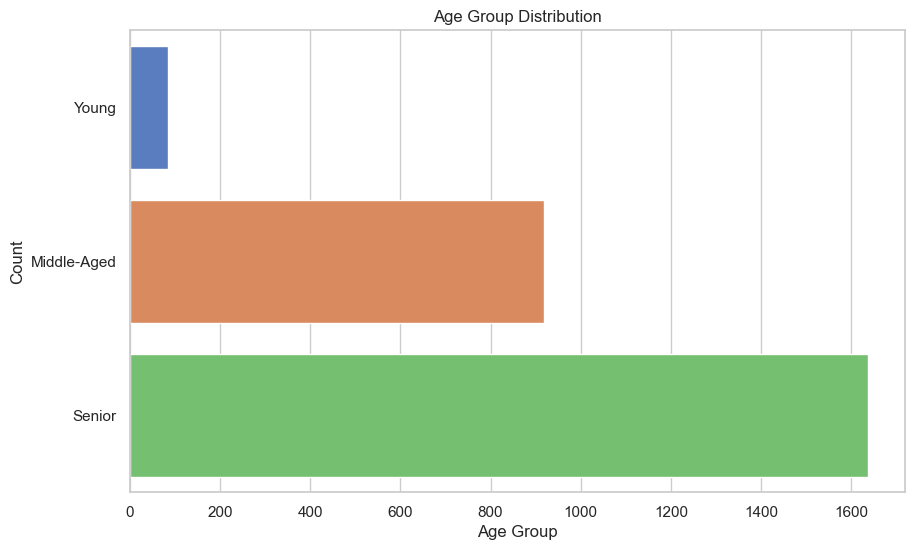

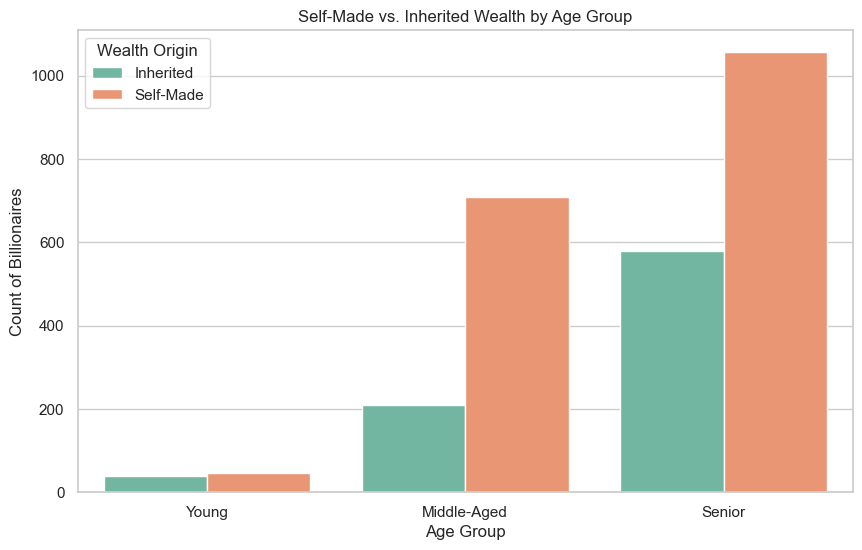

C:\Users\milto\AppData\Local\Temp\ipykernel_25632\1399604143.py:64: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\milto\AppData\Local\Temp\ipykernel_25632\1399604143.py:66: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




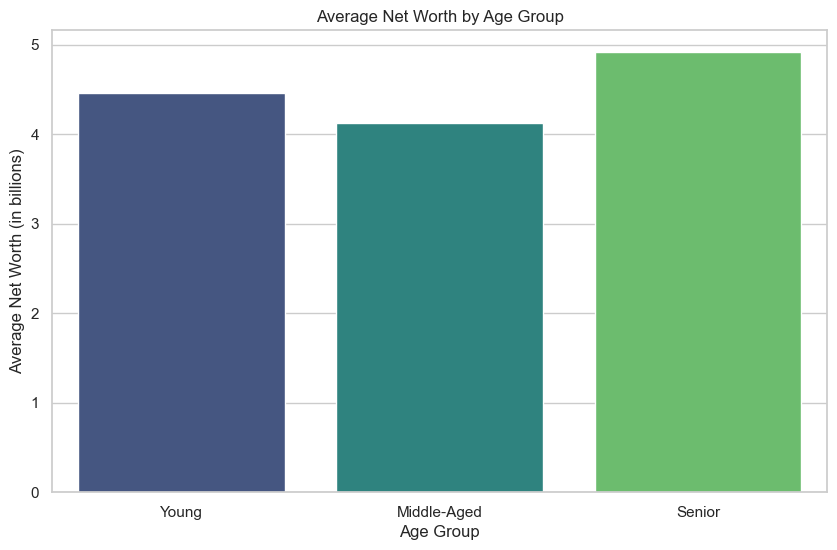

C:\Users\milto\AppData\Local\Temp\ipykernel_25632\1399604143.py:74: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




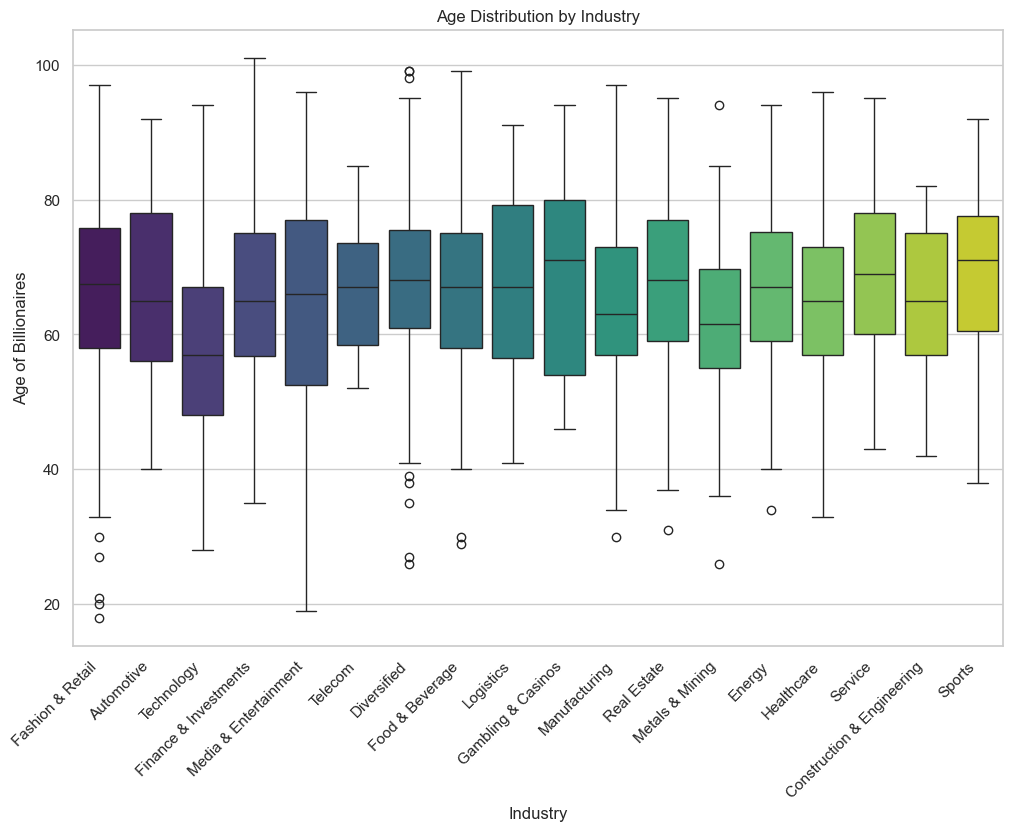

C:\Users\milto\AppData\Local\Temp\ipykernel_25632\1399604143.py:84: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




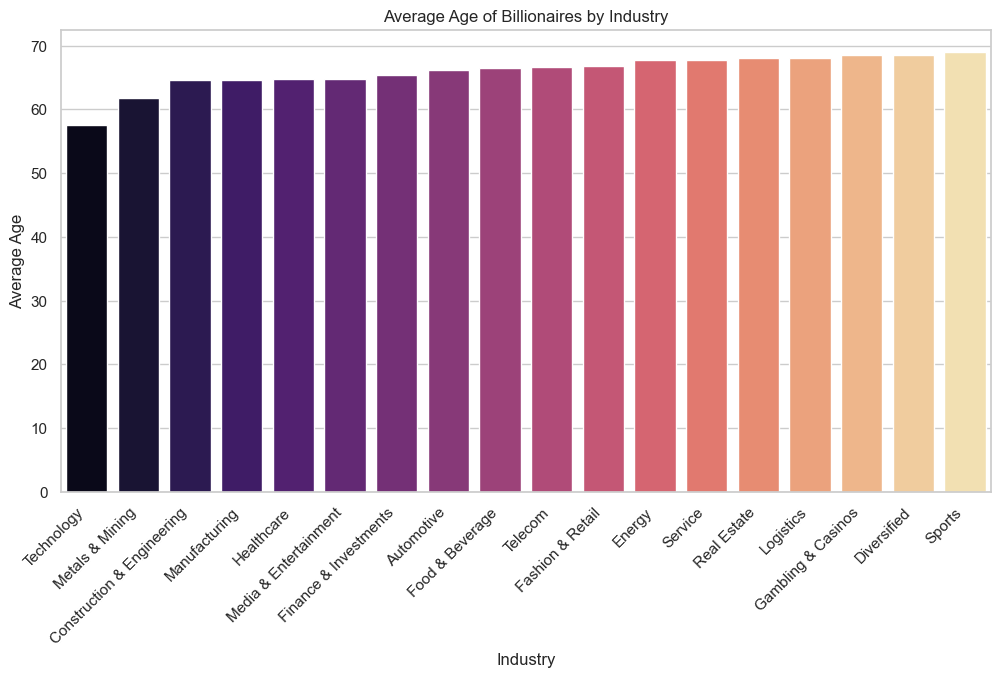

In [6]:
# Exploratory Data Analysis

# Set visualization aesthetics
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Distribution of Numerical Features
# Age Distribution
plt.figure()
sns.histplot(data['age'], kde=True, color="skyblue", bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Net Worth Distribution (in billions)
plt.figure()
sns.histplot(data['net_worth_billion'], kde=True, color="coral", bins=30)
plt.title('Net Worth Distribution (in billions)')
plt.xlabel('Net Worth (Billion $)')
plt.ylabel('Frequency')
plt.show()

# Categorical Distributions
# Wealth Origin Distribution
plt.figure()
sns.countplot(data['wealth_origin'], palette="muted")
plt.title('Wealth Origin Distribution')
plt.xlabel('Wealth Origin')
plt.ylabel('Count')
plt.show()

# Age Group Distribution
plt.figure()
sns.countplot(data['age_group'], palette="muted")
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

# Geographical Analysis - Billionaire Net Worth by Country
fig = px.scatter_geo(data, 
                     lat='latitude_country', 
                     lon='longitude_country',
                     color='country',
                     size='net_worth_billion',
                     hover_name='country',
                     hover_data={'net_worth_billion': True},
                     title="Global Distribution of Billionaire Net Worth")
fig.update_geos(showland=True, landcolor="lightgrey", coastlinecolor="black")
fig.update_layout(height=600, margin={"r":0,"t":40,"l":0,"b":0})
fig.show()

# Analysis by Age and Wealth Origin
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='age_group', hue='wealth_origin', palette='Set2')
plt.title("Self-Made vs. Inherited Wealth by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count of Billionaires")
plt.legend(title="Wealth Origin")
plt.show()

# Average Net Worth by Age Group
average_net_worth_by_age_group = data.groupby('age_group')['net_worth_billion'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=average_net_worth_by_age_group, x='age_group', y='net_worth_billion', palette='viridis')
plt.title("Average Net Worth by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Net Worth (in billions)")
plt.show()

# Relationship between Age and Industry
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='industries', y='age', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title("Age Distribution by Industry")
plt.xlabel("Industry")
plt.ylabel("Age of Billionaires")
plt.show()

# Average Age by Industry
average_age_by_industry = data.groupby('industries')['age'].mean().sort_values().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=average_age_by_industry, x='industries', y='age', palette='magma')
plt.xticks(rotation=45, ha='right')
plt.title("Average Age of Billionaires by Industry")
plt.xlabel("Industry")
plt.ylabel("Average Age")
plt.show()

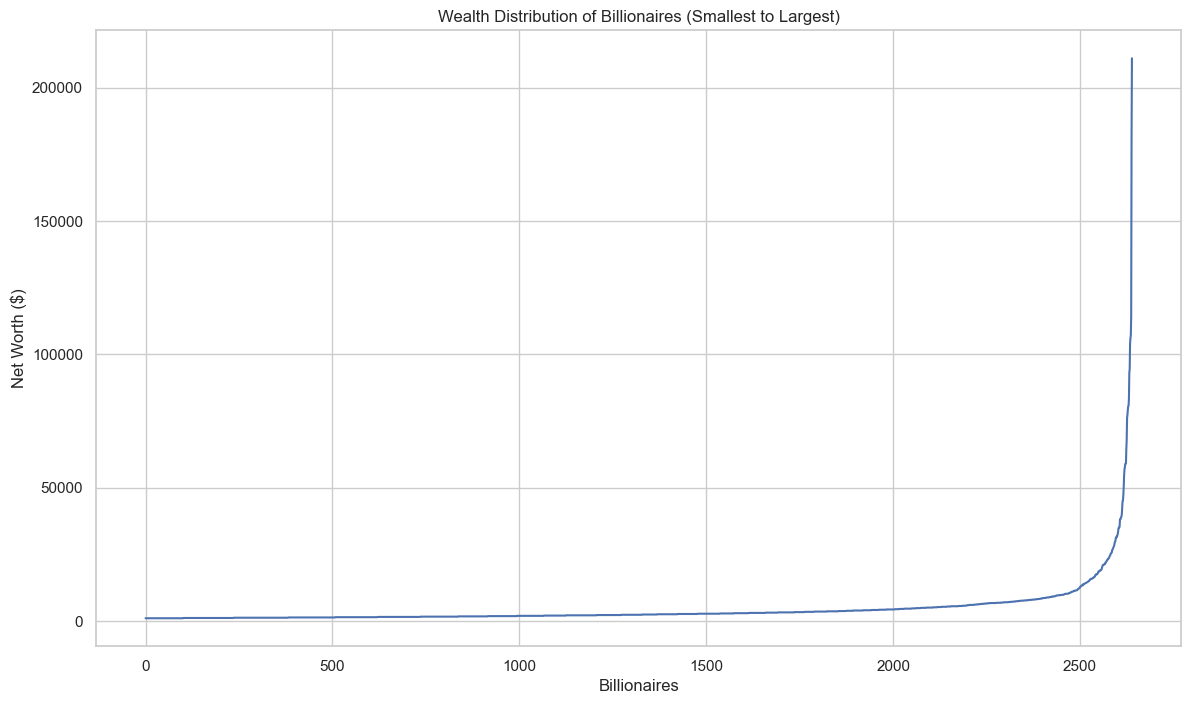

                               personName  finalWorth
10  Francoise Bettencourt Meyers & family       80500
9                           Steve Ballmer       80700
8                           Mukesh Ambani       83400
7               Carlos Slim Helu & family       93000
6                       Michael Bloomberg       94500
5                              Bill Gates      104000
4                          Warren Buffett      106000
3                           Larry Ellison      107000
2                              Jeff Bezos      114000
1                               Elon Musk      180000
0                Bernard Arnault & family      211000


In [7]:
# Wealth Distribution (Smallest to Largest)

# Sort data by 'finalWorth' and plot it
sorted_data = data.sort_values(by='finalWorth', ascending=True)
plt.figure(figsize=(14, 8))
plt.plot(sorted_data['finalWorth'].values)
plt.title('Wealth Distribution of Billionaires (Smallest to Largest)')
plt.xlabel('Billionaires')
plt.ylabel('Net Worth ($)')
plt.show()

# Get top 10% of billionaires by total wealth
total_finalWorth = data['finalWorth'].sum()
top_10_percent_threshold = total_finalWorth * 0.9
sorted_data['cumulative_wealth'] = sorted_data['finalWorth'].cumsum()
top_10_percent = sorted_data[sorted_data['cumulative_wealth'] >= top_10_percent_threshold]
print(top_10_percent[['personName', 'finalWorth']])

In [8]:
# Geographical Distribution of Billionaires (Map of Countries and Cities)

# Visualize distribution of billionaire wealth by country and city
fig_geo = px.scatter_geo(data, locations="country", locationmode="country names", 
                         color="country", size="finalWorth",
                         hover_name="personName", 
                         hover_data={"finalWorth": True, "city": True},
                         title="Geographical Distribution of Billionaires by Country and City")
fig_geo.show()

In [9]:
# Wealth Distribution by Industry and Geography (Sunburst Chart)
# Visualize industry-based wealth distribution across countries
fig_industry_geo = px.sunburst(data, path=['country', 'industries'], values='finalWorth',
                               color='finalWorth', 
                               hover_data={'personName': True},
                               title="Industry and Geographic Distribution of Billionaire Wealth")
fig_industry_geo.show()

C:\Users\milto\AppData\Local\Temp\ipykernel_25632\2379124636.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




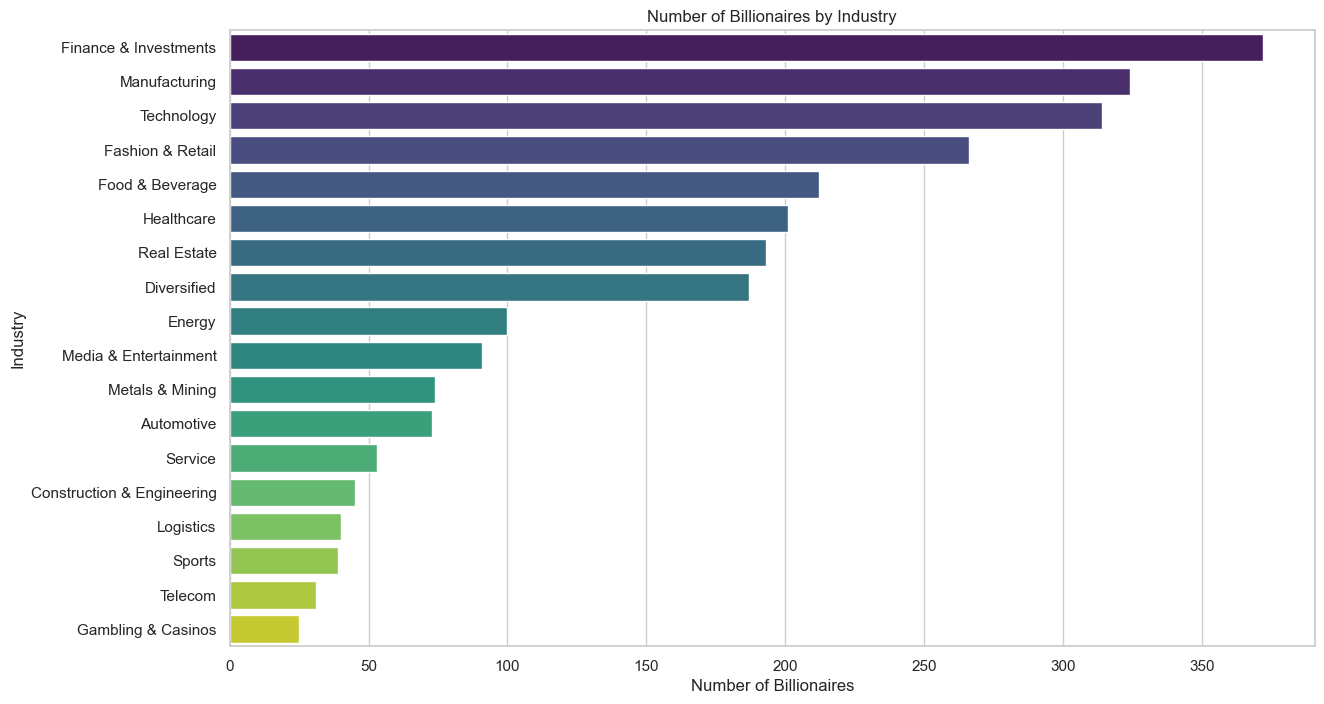

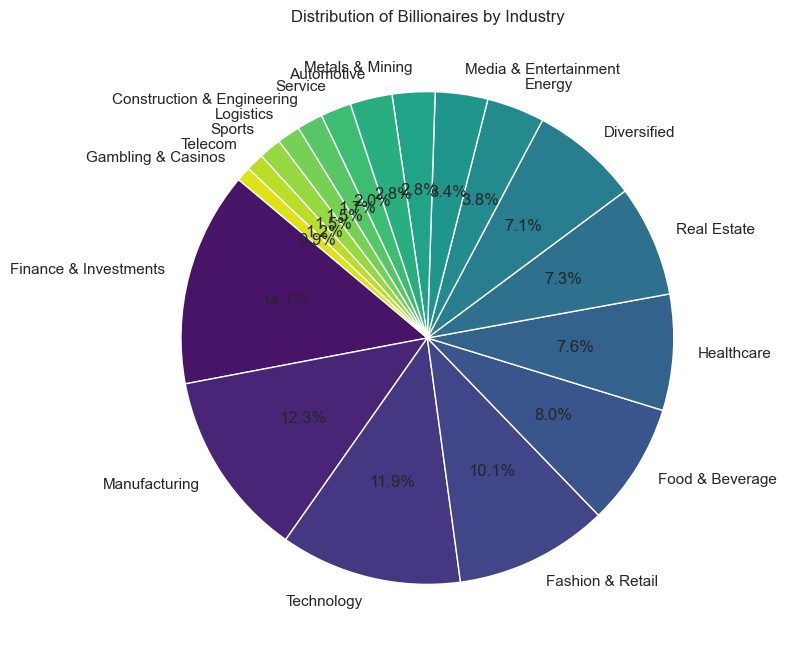

In [10]:
# Count the number of billionaires by industry
industry_counts = data['industries'].value_counts().reset_index()
industry_counts.columns = ['Industry', 'Count']

# 1. Bar plot to show the number of billionaires by industry
plt.figure(figsize=(14, 8))
sns.barplot(data=industry_counts, x='Count', y='Industry', palette='viridis')
plt.title('Number of Billionaires by Industry')
plt.xlabel('Number of Billionaires')
plt.ylabel('Industry')
plt.show()

# 2. Pie chart to visualize the distribution of billionaires across industries
plt.figure(figsize=(10, 8))
plt.pie(industry_counts['Count'], labels=industry_counts['Industry'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(industry_counts)))
plt.title('Distribution of Billionaires by Industry')
plt.show()


C:\Users\milto\AppData\Local\Temp\ipykernel_25632\1173118696.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




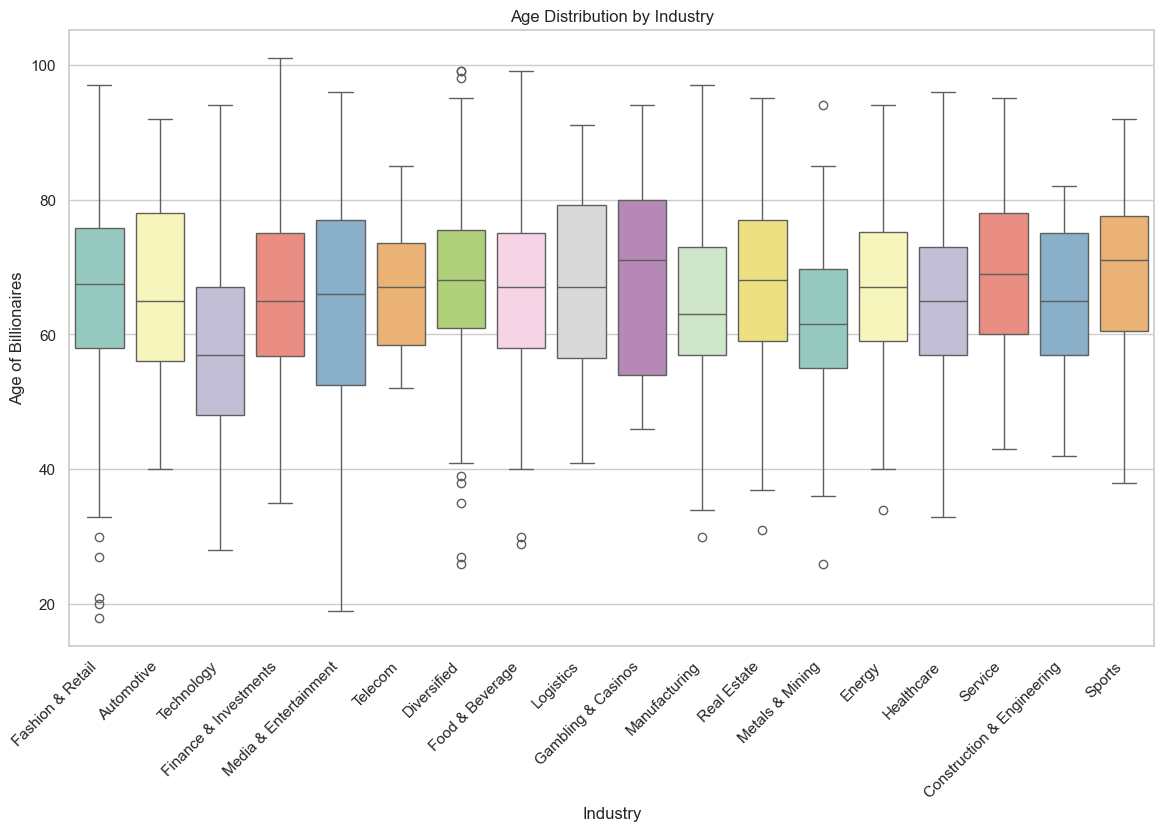

C:\Users\milto\AppData\Local\Temp\ipykernel_25632\1173118696.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




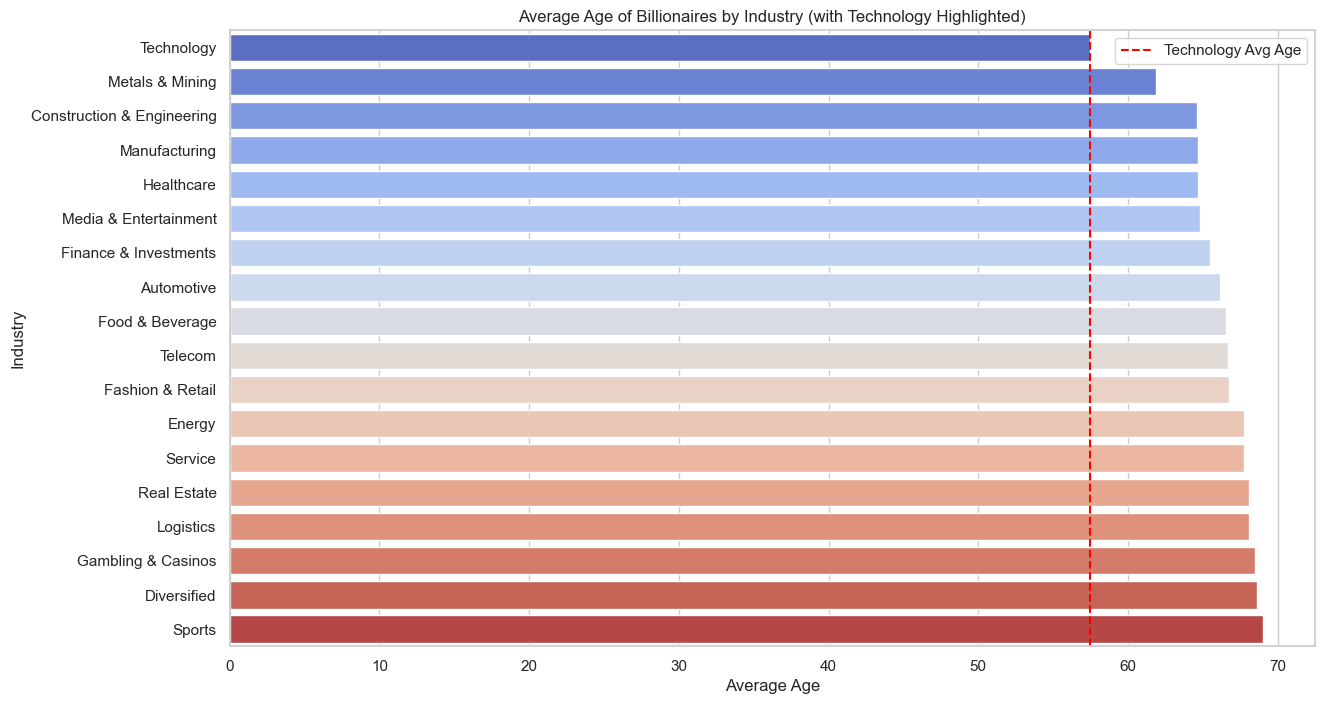

In [11]:
# Filter the dataset to include only age and industry columns and drop any missing values
industry_age_data = data[['age', 'industries']].dropna()

# 1. Boxplot to show the age distribution across industries, highlighting younger trends in specific sectors
plt.figure(figsize=(14, 8))
sns.boxplot(data=industry_age_data, x='industries', y='age', palette='Set3')
plt.xticks(rotation=45, ha='right')
plt.title('Age Distribution by Industry')
plt.xlabel('Industry')
plt.ylabel('Age of Billionaires')
plt.show()

# 2. Average age by industry with a focus on the technology sector
average_age_by_industry = industry_age_data.groupby('industries')['age'].mean().reset_index()
average_age_by_industry = average_age_by_industry.sort_values(by='age')

# Plot average age across industries and highlight the tech sector
plt.figure(figsize=(14, 8))
sns.barplot(data=average_age_by_industry, x='age', y='industries', palette='coolwarm')
plt.axvline(average_age_by_industry[average_age_by_industry['industries'] == 'Technology']['age'].values[0], color='red', linestyle='--', label="Technology Avg Age")
plt.title("Average Age of Billionaires by Industry (with Technology Highlighted)")
plt.xlabel("Average Age")
plt.ylabel("Industry")
plt.legend()
plt.show()


C:\Users\milto\AppData\Local\Temp\ipykernel_25632\2663011671.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




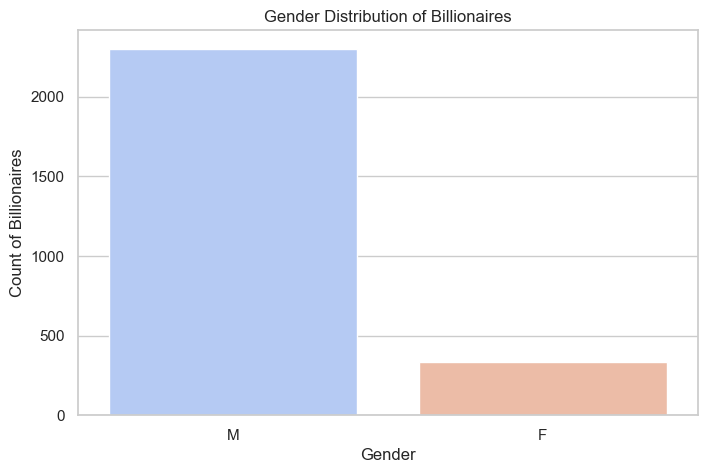

C:\Users\milto\AppData\Local\Temp\ipykernel_25632\2663011671.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




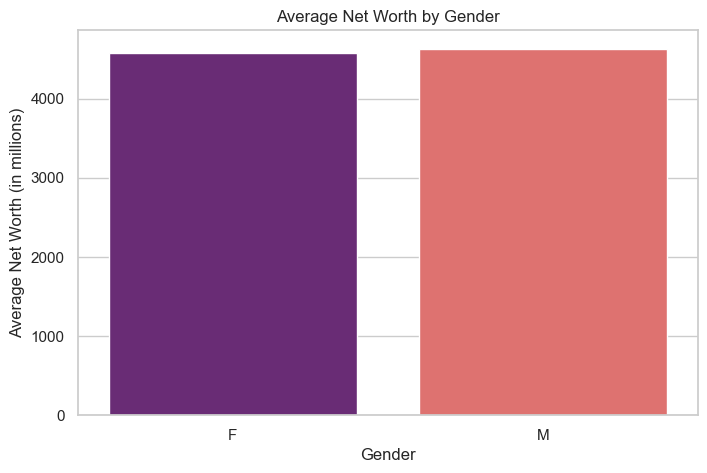

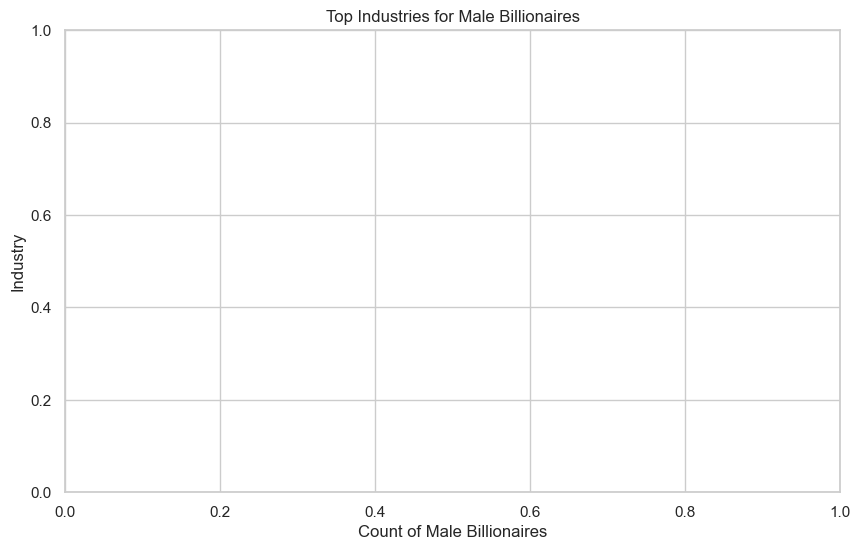

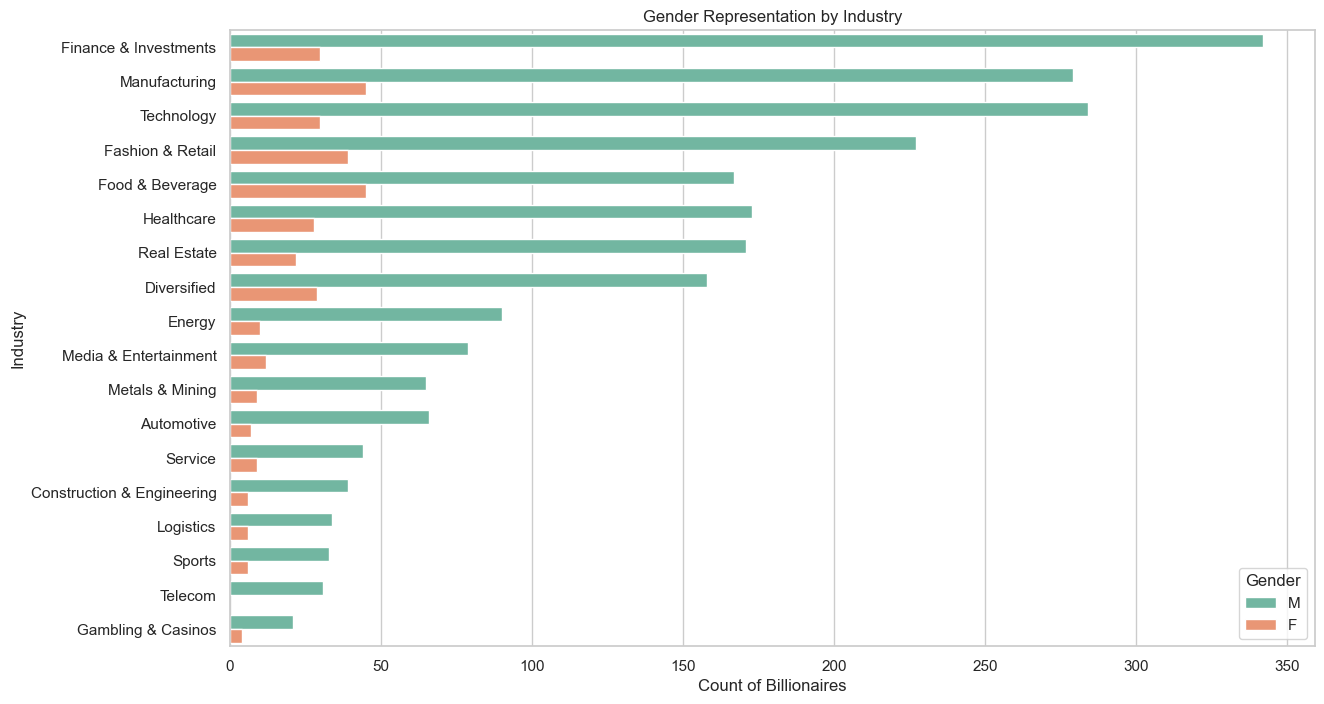

In [22]:
# Gender Distribution: Count of Male vs. Female Billionaires
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='gender', palette='coolwarm')
plt.title("Gender Distribution of Billionaires")
plt.xlabel("Gender")
plt.ylabel("Count of Billionaires")
plt.show()

# Average Net Worth by Gender
average_net_worth_by_gender = data.groupby('gender')['finalWorth'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=average_net_worth_by_gender, x='gender', y='finalWorth', palette='magma')
plt.title("Average Net Worth by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Net Worth (in millions)")
plt.show()

# Plot Top Industries for Male Billionaires
plt.figure(figsize=(10, 6))
sns.barplot(y=male_industry_counts.index, x=male_industry_counts.values, palette='coolwarm')
plt.title("Top Industries for Male Billionaires")
plt.xlabel("Count of Male Billionaires")
plt.ylabel("Industry")
plt.show()

# Gender Representation by Industry (Comparative)
plt.figure(figsize=(14, 8))
sns.countplot(data=data, y='industries', hue='gender', palette='Set2', order=data['industries'].value_counts().index)
plt.title("Gender Representation by Industry")
plt.xlabel("Count of Billionaires")
plt.ylabel("Industry")
plt.legend(title="Gender")
plt.show()

In [13]:
# Group the data by country and calculate total net worth for each country
country_wealth = data.groupby('country', as_index=False)['net_worth_billion'].sum()

# Create a treemap
fig = px.treemap(
    country_wealth, 
    path=['country'],  # Hierarchical path
    values='net_worth_billion',  # Size of the boxes
    color='net_worth_billion',  # Color based on net worth
    color_continuous_scale='viridis',  # Color scale
    title='Global Distribution of Billionaire Net Worth by Country'
)

# Update layout for better appearance
fig.update_layout(
    margin=dict(t=50, l=25, r=25, b=25),  # Set margins
    coloraxis_colorbar=dict(
        title="Net Worth (Billion $)", 
        ticksuffix="B", 
        thickness=15
    )
)

# Show the treemap
fig.show()

In [15]:
# **Calculate Total Number of Entries**
total_entries = data.shape[0]

# **Calculate Total Wealth**
# 'finalWorth' represents the wealth in millions
total_wealth = data['finalWorth'].sum()  # Total wealth in millions

# Convert total wealth to billions for readability
total_wealth_in_billions = total_wealth / 1e3

# **Display Results**
print(f"Total Number of Entries in the Dataset: {total_entries}")
print(f"Total Wealth Represented in the Dataset: ${total_wealth_in_billions:.2f} Billion")

Total Number of Entries in the Dataset: 2640
Total Wealth Represented in the Dataset: $12206.80 Billion


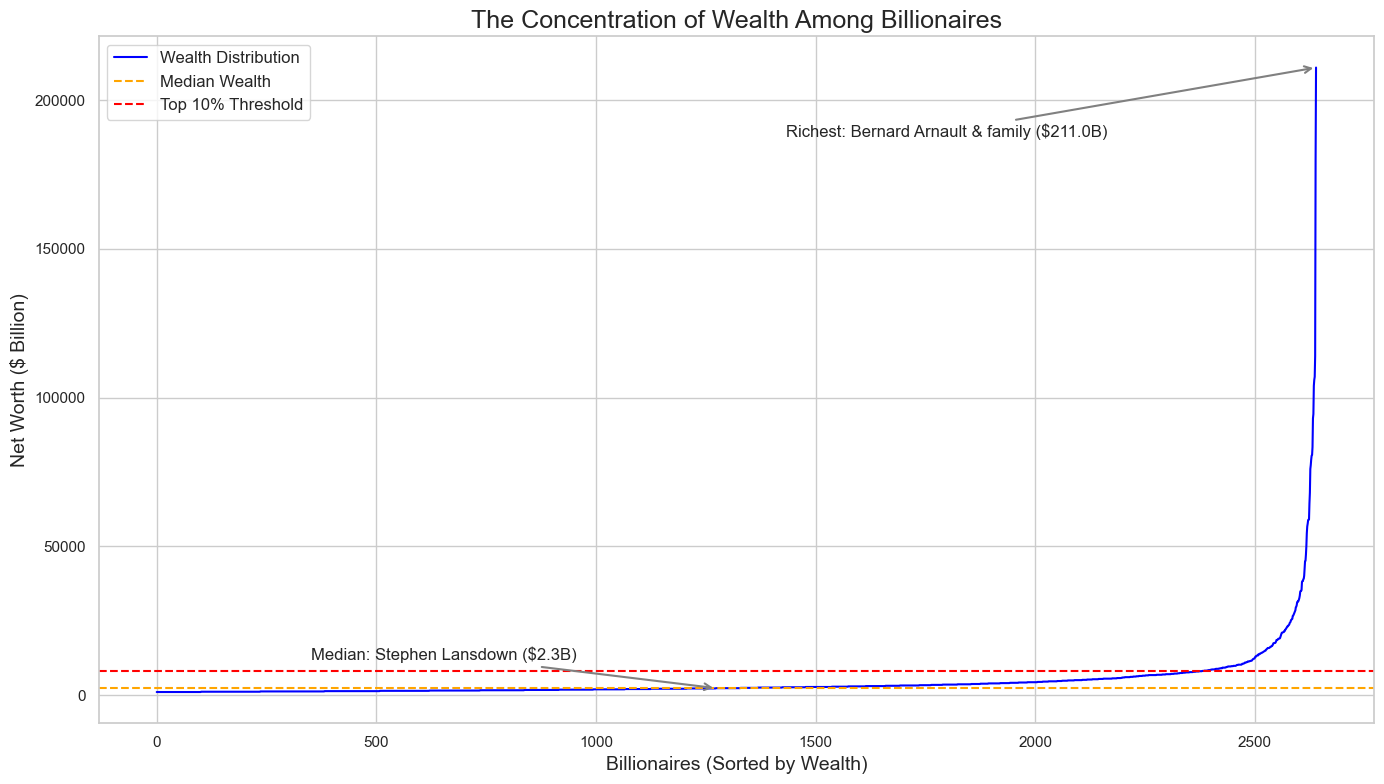

In [16]:
# **1. Sort the data by wealth**
sorted_data = data.sort_values(by='finalWorth', ascending=True)

# **2. Calculate thresholds for the top 10% and median**
top_10_percent_threshold = sorted_data['finalWorth'].quantile(0.9)
median_wealth = sorted_data['finalWorth'].median()

# **3. Highlight the richest and median entries**
richest_billionaire = sorted_data.iloc[-1]
median_billionaire = sorted_data[sorted_data['finalWorth'] == median_wealth].iloc[0]

# **4. Create the line plot for wealth distribution**
plt.figure(figsize=(14, 8))
plt.plot(sorted_data['finalWorth'].values, label='Wealth Distribution', color='blue')
plt.axhline(y=median_wealth, color='orange', linestyle='--', label='Median Wealth')
plt.axhline(y=top_10_percent_threshold, color='red', linestyle='--', label='Top 10% Threshold')

# Annotate the richest billionaire (inside the graph)
plt.annotate(
    f"Richest: {richest_billionaire['personName']} (${richest_billionaire['finalWorth'] / 1e3:.1f}B)", 
    xy=(len(sorted_data) - 1, richest_billionaire['finalWorth']),
    xytext=(-150, -50),  # Shifted inside the graph
    textcoords='offset points',
    arrowprops=dict(arrowstyle="->", color='gray', lw=1.5),
    fontsize=12,  # Larger font size
    ha='right'
)

# Annotate the median billionaire (inside the graph)
plt.annotate(
    f"Median: {median_billionaire['personName']} (${median_billionaire['finalWorth'] / 1e3:.1f}B)", 
    xy=(sorted_data.index.get_loc(median_billionaire.name), median_wealth),
    xytext=(-100, 20),  # Shifted inside the graph
    textcoords='offset points',
    arrowprops=dict(arrowstyle="->", color='gray', lw=1.5),
    fontsize=12,  # Larger font size
    ha='right'
)

# **5. Add titles, labels, and legend**
plt.title('The Concentration of Wealth Among Billionaires', fontsize=18)
plt.xlabel('Billionaires (Sorted by Wealth)', fontsize=14)
plt.ylabel('Net Worth ($ Billion)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# **6. Show the plot**
plt.tight_layout()
plt.show()


Average Wealth of All Billionaires: $4.62 Billion
Average Wealth of Top 10% Billionaires: $21.84 Billion
The wealth of the Top 10% is 4.7 times greater than the average.


C:\Users\milto\AppData\Local\Temp\ipykernel_25632\1536266014.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




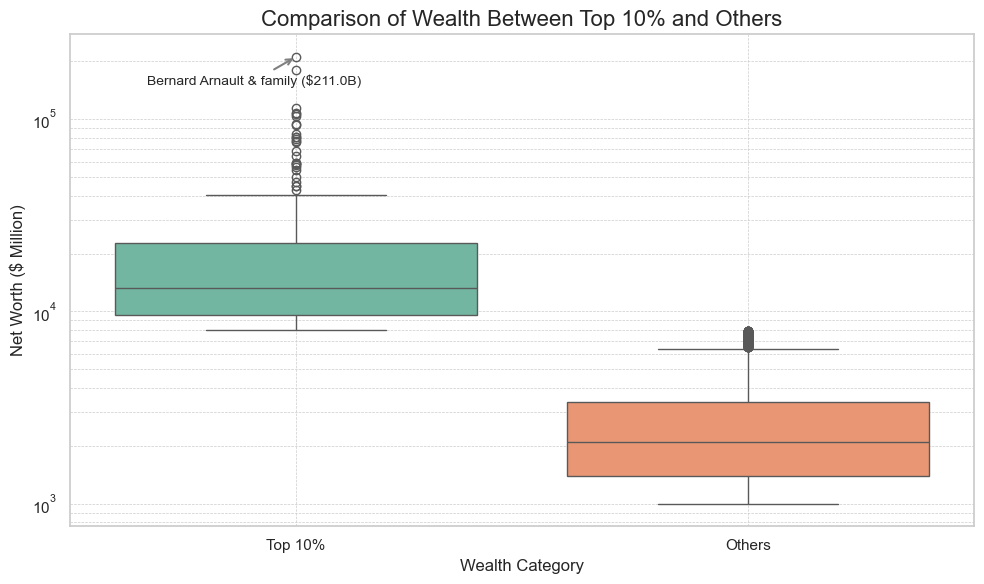

In [17]:
# **1. Define the Top 10% Wealth Threshold**
top_10_percent_threshold = data['finalWorth'].quantile(0.9)

# **2. Categorize Billionaires**
data['Wealth Category'] = ['Top 10%' if x >= top_10_percent_threshold else 'Others' for x in data['finalWorth']]

# **3. Calculate Summary Statistics**
average_wealth = data['finalWorth'].mean()
top_10_average_wealth = data[data['Wealth Category'] == 'Top 10%']['finalWorth'].mean()

# Display standout statistics
print(f"Average Wealth of All Billionaires: ${average_wealth / 1e3:.2f} Billion")
print(f"Average Wealth of Top 10% Billionaires: ${top_10_average_wealth / 1e3:.2f} Billion")
print(f"The wealth of the Top 10% is {top_10_average_wealth / average_wealth:.1f} times greater than the average.")

# **4. Visualization: Box Plot**
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Wealth Category', y='finalWorth', palette='Set2')
plt.title('Comparison of Wealth Between Top 10% and Others', fontsize=16)
plt.xlabel('Wealth Category', fontsize=12)
plt.ylabel('Net Worth ($ Million)', fontsize=12)
plt.yscale('log')  # Use logarithmic scale for better visualization of disparities
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Highlight standout billionaires
richest_billionaire = data[data['finalWorth'] == data['finalWorth'].max()]
plt.annotate(
    f"{richest_billionaire.iloc[0]['personName']} (${richest_billionaire.iloc[0]['finalWorth'] / 1e3:.1f}B)", 
    xy=(0, richest_billionaire['finalWorth'].max()), 
    xytext=(-30, -20), 
    textcoords='offset points',
    arrowprops=dict(arrowstyle="->", color='gray', lw=1.5),
    fontsize=10,
    ha='center'
)

# Show the plot
plt.tight_layout()
plt.show()

Average Age of Billionaires: 65.1 years
Youngest Billionaire: Clemente Del Vecchio, Age 18.0
Oldest Billionaire: George Joseph, Age 101.0


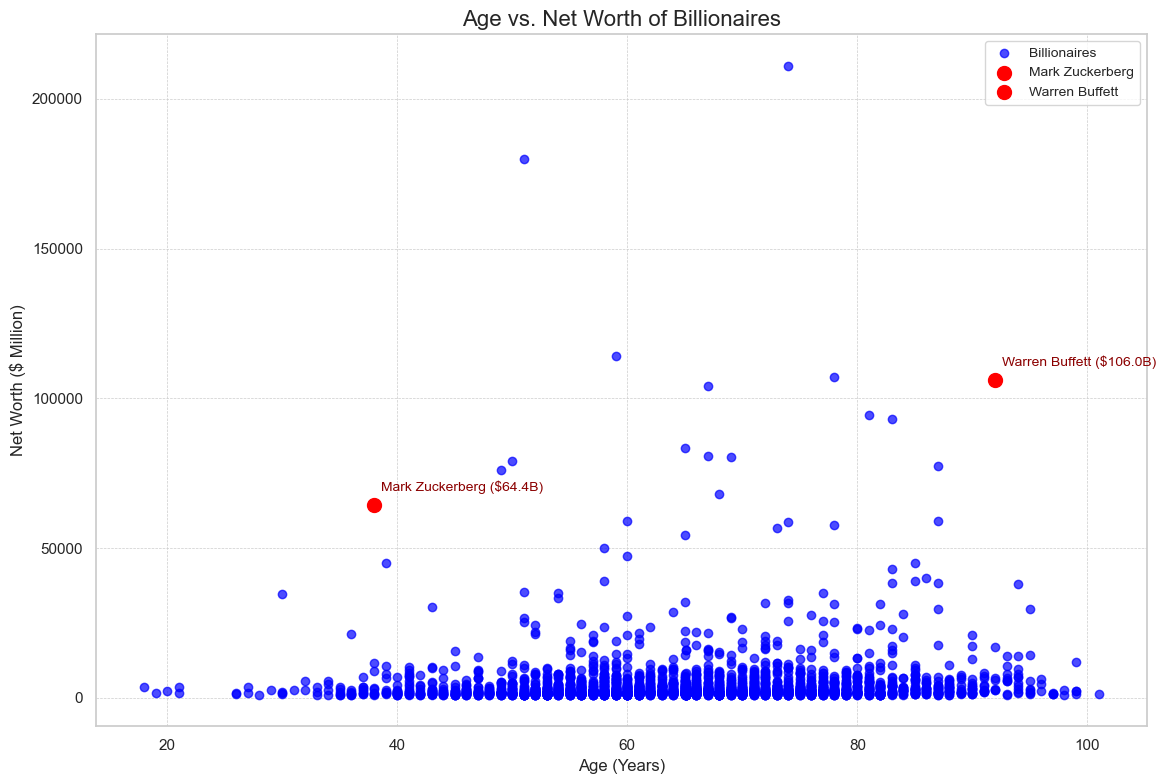

In [18]:
# **1. Calculate Age Statistics**
average_age = data['age'].mean()
youngest_billionaire = data[data['age'] == data['age'].min()]
oldest_billionaire = data[data['age'] == data['age'].max()]

# Display age trends
print(f"Average Age of Billionaires: {average_age:.1f} years")
print(f"Youngest Billionaire: {youngest_billionaire.iloc[0]['personName']}, Age {youngest_billionaire.iloc[0]['age']}")
print(f"Oldest Billionaire: {oldest_billionaire.iloc[0]['personName']}, Age {oldest_billionaire.iloc[0]['age']}")

# **2. Scatter Plot: Age vs. Net Worth**
plt.figure(figsize=(12, 8))
plt.scatter(data['age'], data['finalWorth'], alpha=0.7, color='blue', label='Billionaires')
plt.title('Age vs. Net Worth of Billionaires', fontsize=16)
plt.xlabel('Age (Years)', fontsize=12)
plt.ylabel('Net Worth ($ Million)', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Highlight specific outliers (e.g., Mark Zuckerberg and Warren Buffett)
# Replace 'Mark Zuckerberg' and 'Warren Buffett' with actual names in your dataset
highlight_names = ['Mark Zuckerberg', 'Warren Buffett']
for name in highlight_names:
    outlier = data[data['personName'] == name]
    if not outlier.empty:
        plt.scatter(outlier['age'], outlier['finalWorth'], color='red', s=100, label=f"{name}")
        plt.annotate(
            f"{name} (${outlier.iloc[0]['finalWorth'] / 1e3:.1f}B)", 
            xy=(outlier.iloc[0]['age'], outlier.iloc[0]['finalWorth']),
            xytext=(5, 10), 
            textcoords='offset points',
            fontsize=10,
            color='darkred'
        )

# Add legend
plt.legend(fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

Total Billionaires: 2640
Female Billionaires: 0 (0.0%)
Male Billionaires: 0


C:\Users\milto\AppData\Local\Temp\ipykernel_25632\3958011849.py:22: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\milto\AppData\Local\Temp\ipykernel_25632\3958011849.py:28: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




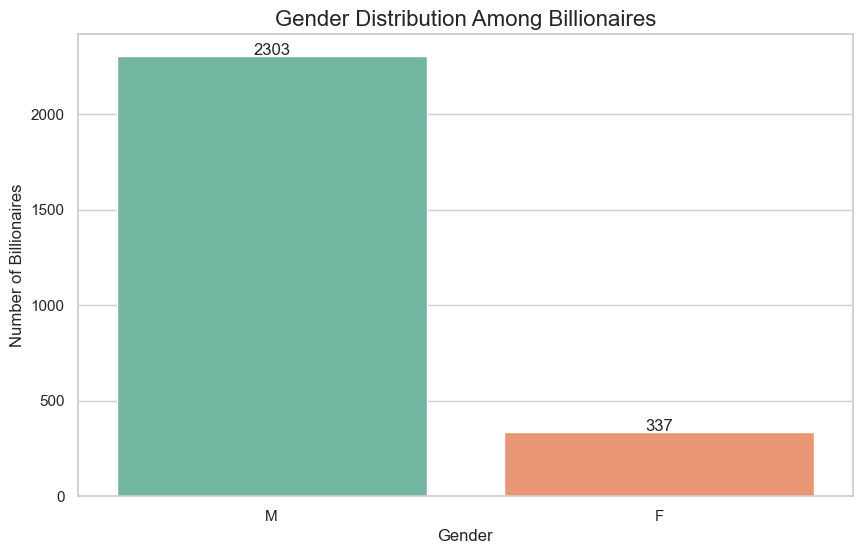

C:\Users\milto\AppData\Local\Temp\ipykernel_25632\3958011849.py:41: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




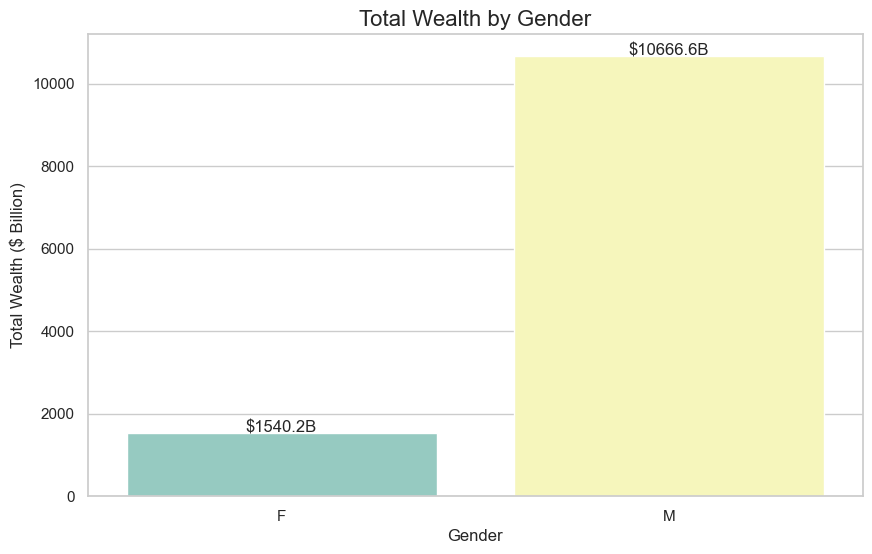

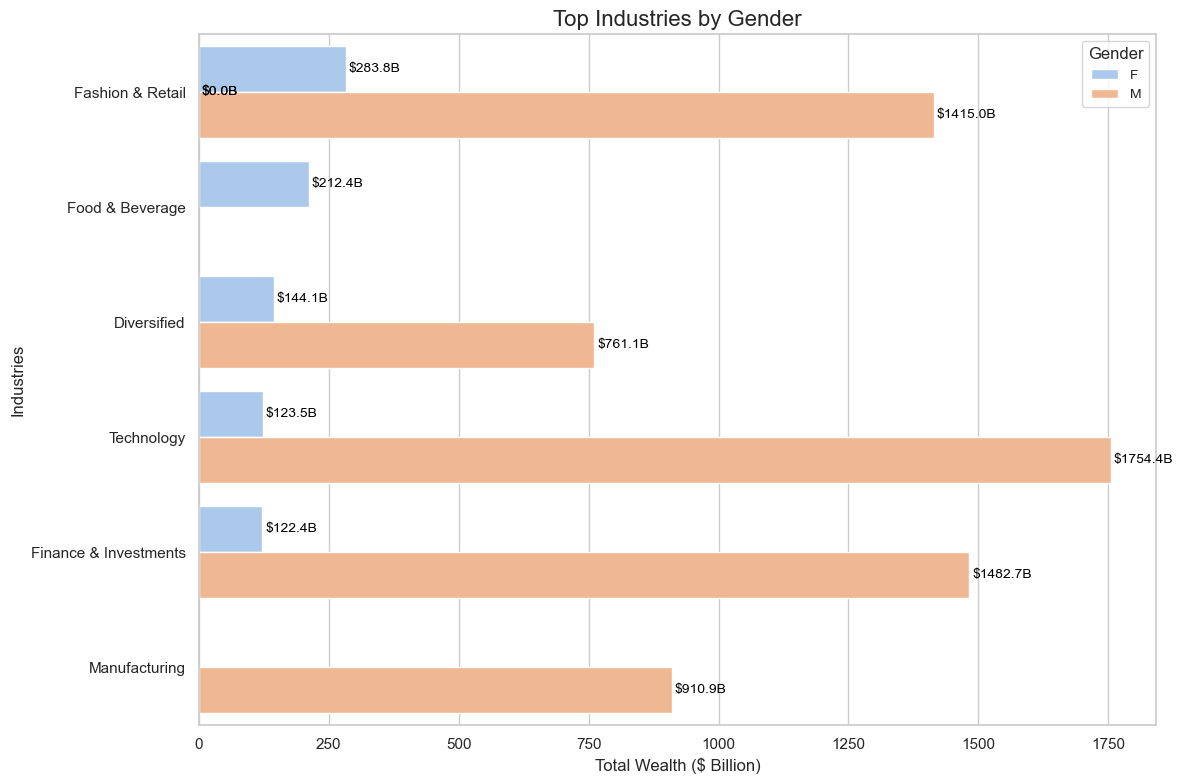

In [19]:
# **1. Analyze Gender Distribution**
gender_counts = data['gender'].value_counts()
female_percentage = (gender_counts.get('Female', 0) / gender_counts.sum()) * 100

# Display gender statistics
print(f"Total Billionaires: {gender_counts.sum()}")
print(f"Female Billionaires: {gender_counts.get('Female', 0)} ({female_percentage:.1f}%)")
print(f"Male Billionaires: {gender_counts.get('Male', 0)}")

# **2. Aggregate Wealth by Gender**
wealth_by_gender = data.groupby('gender')['finalWorth'].sum().reset_index()
wealth_by_gender['finalWorth_billion'] = wealth_by_gender['finalWorth'] / 1e3  # Convert to billions

# **3. Wealth by Gender and Industry**
wealth_gender_industry = data.groupby(['gender', 'industries'])['finalWorth'].sum().reset_index()
wealth_gender_industry['finalWorth_billion'] = wealth_gender_industry['finalWorth'] / 1e3  # Convert to billions

# Top 5 industries for each gender
top_industries_by_gender = wealth_gender_industry.groupby('gender').apply(
    lambda x: x.sort_values(by='finalWorth', ascending=False).head(5)
).reset_index(drop=True)

# **4. Bar Chart: Gender Distribution**
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='Set2')
plt.title('Gender Distribution Among Billionaires', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Billionaires', fontsize=12)

# Add annotations
for i, value in enumerate(gender_counts.values):
    ax.text(i, value + 5, f"{value}", ha='center', fontsize=12)

plt.show()

# **5. Bar Chart: Total Wealth by Gender**
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='gender', y='finalWorth_billion', data=wealth_by_gender, palette='Set3')
plt.title('Total Wealth by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Total Wealth ($ Billion)', fontsize=12)

# Add annotations
for i, value in enumerate(wealth_by_gender['finalWorth_billion']):
    ax.text(i, value + 20, f"${value:.1f}B", ha='center', fontsize=12)

plt.show()

# **6. Industry Comparison: Top Industries by Gender**
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    x='finalWorth_billion', 
    y='industries', 
    hue='gender', 
    data=top_industries_by_gender, 
    palette='pastel'
)
plt.title('Top Industries by Gender', fontsize=16)
plt.xlabel('Total Wealth ($ Billion)', fontsize=12)
plt.ylabel('Industries', fontsize=12)
plt.legend(title='Gender', fontsize=10)

# Add annotations
for bar in ax.patches:
    x = bar.get_width()  # Bar width represents the wealth
    y = bar.get_y() + bar.get_height() / 2  # Center of the bar
    ax.text(x + 5, y, f"${x:.1f}B", va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()


In [20]:
# List of top 10 individuals to analyze
top_individuals = [
    "Elon Musk", "Jeff Bezos", "Bernard Arnault & Family", "Mark Zuckerberg",
    "Larry Ellison", "Warren Buffett", "Bill Gates", "Larry Page",
    "Sergey Brin", "Steve Ballmer"
]

# **1. Filter dataset for top individuals**
top_individuals_data = data[data['personName'].isin(top_individuals)]

# **2. Calculate total net worth for the top individuals**
top_individuals_total_wealth = top_individuals_data['finalWorth'].sum()  # Assuming 'finalWorth' represents wealth in millions

# **3. Calculate total wealth in the dataset**
total_wealth = data['finalWorth'].sum()

# **4. Calculate percentage representation**
percentage_of_total = (top_individuals_total_wealth / total_wealth) * 100

# **5. Display Results**
print(f"Total Net Worth of Top 10 Individuals: ${top_individuals_total_wealth / 1e3:.2f} Billion")
print(f"Total Wealth in Dataset: ${total_wealth / 1e3:.2f} Billion")
print(f"Percentage of Total Wealth Represented by Top 10 Individuals: {percentage_of_total:.2f}%")

Total Net Worth of Top 10 Individuals: $911.30 Billion
Total Wealth in Dataset: $12206.80 Billion
Percentage of Total Wealth Represented by Top 10 Individuals: 7.47%


In [ ]:
# Additional Dataset for Analysis

In [23]:
# Load and Inspect Second Dataset**
file_path_second = 'Global Billionaire Wealth.zip'
csv_filename_second = 'billionaire_list_20yrs.csv'

# Read the second dataset from the ZIP file
with zipfile.ZipFile(file_path_second, 'r') as z:
    with z.open(csv_filename_second) as f:
        df_second = pd.read_csv(f)

# Inspect the dataset
print("Columns in the second dataset:")
print(df_second.columns)

# Handle missing values
df_second['gender'].fillna(df_second['gender'].mode()[0], inplace=True)
df_second['company'].fillna('Unknown', inplace=True)
df_second['permanent_country'].fillna('Unknown', inplace=True)

# Split 'permanent_country' into 'country' and 'city'
if 'permanent_country' in df_second.columns:
    country_city_split = df_second['permanent_country'].str.split('-', n=1, expand=True)
    df_second['country'] = country_city_split[0].str.strip()
    df_second['city'] = country_city_split[1].str.strip() if len(country_city_split.columns) > 1 else None

# Normalize numerical columns
if 'annual_income' in df_second.columns:
    df_second['annual_income_normalized'] = (
        df_second['annual_income'] - df_second['annual_income'].mean()
    ) / df_second['annual_income'].std()

# Save the cleaned dataset
df_second.to_csv('cleaned_global_billionaire_data.csv', index=False)
print("Second dataset cleaned and saved as 'cleaned_global_billionaire_data.csv'.")

Columns in the second dataset:
Index(['Unnamed: 0', 'name', 'last_name', 'age', 'gender', 'time',
       'permanent_country', 'company', 'main_industry',
       'wealth_source_details', 'industry', 'state', 'headquarters',
       'countries', 'annual_income', 'daily_income', 'birth_year',
       'name_cleaned'],
      dtype='object')


C:\Users\milto\AppData\Local\Temp\ipykernel_25632\2120342619.py:15: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\milto\AppData\Local\Temp\ipykernel_25632\2120342619.py:16: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

Second dataset cleaned and saved as 'cleaned_global_billionaire_data.csv'.


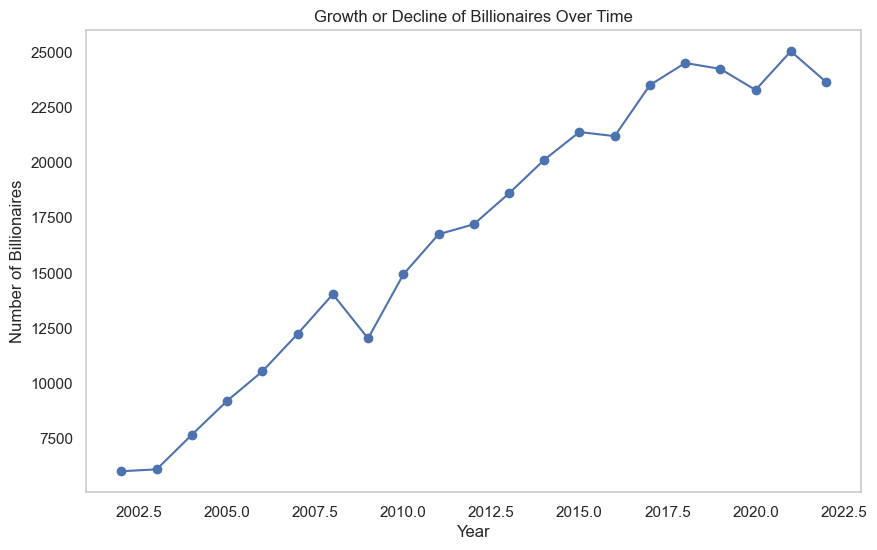

In [24]:
# Trend Analysis: Growth or Decline of Billionaires Over Time**
# Count number of billionaires by year
if 'time' in df_second.columns:
    billionaires_by_year = df_second.groupby('time').size()

    # Plot line chart
    plt.figure(figsize=(10, 6))
    billionaires_by_year.plot(kind='line', marker='o')
    plt.title('Growth or Decline of Billionaires Over Time')
    plt.xlabel('Year')
    plt.ylabel('Number of Billionaires')
    plt.grid()
    plt.show()

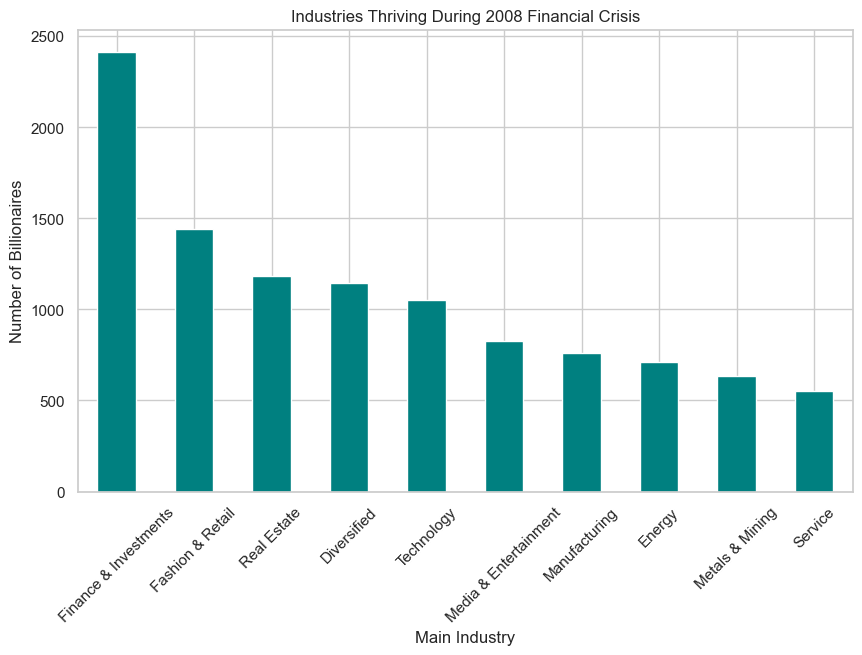

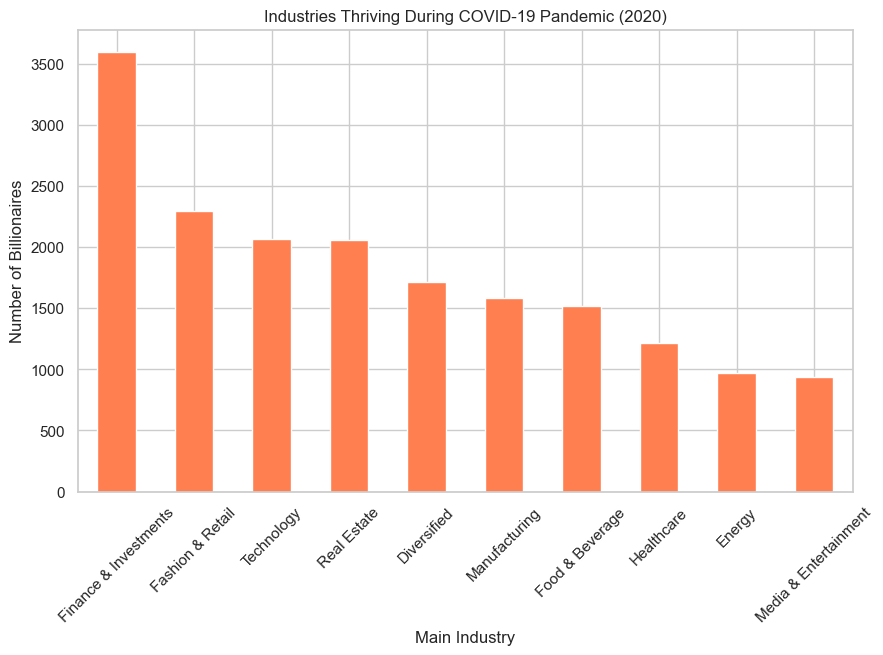

In [25]:
# Industries Thriving During Economic Turmoil**
# Filter data for specific years of turmoil
if 'time' in df_second.columns:
    # 2008 Financial Crisis
    financial_crisis = df_second[df_second['time'] == 2008]
    crisis_industry_counts = financial_crisis['main_industry'].value_counts().head(10)

    # Bar chart for 2008
    plt.figure(figsize=(10, 6))
    crisis_industry_counts.plot(kind='bar', color='teal')
    plt.title('Industries Thriving During 2008 Financial Crisis')
    plt.xlabel('Main Industry')
    plt.ylabel('Number of Billionaires')
    plt.xticks(rotation=45)
    plt.show()

    # 2020 COVID-19 Pandemic
    pandemic = df_second[df_second['time'] == 2020]
    pandemic_industry_counts = pandemic['main_industry'].value_counts().head(10)

    # Bar chart for 2020
    plt.figure(figsize=(10, 6))
    pandemic_industry_counts.plot(kind='bar', color='coral')
    plt.title('Industries Thriving During COVID-19 Pandemic (2020)')
    plt.xlabel('Main Industry')
    plt.ylabel('Number of Billionaires')
    plt.xticks(rotation=45)
    plt.show()

C:\Users\milto\AppData\Local\Temp\ipykernel_25632\1350729429.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




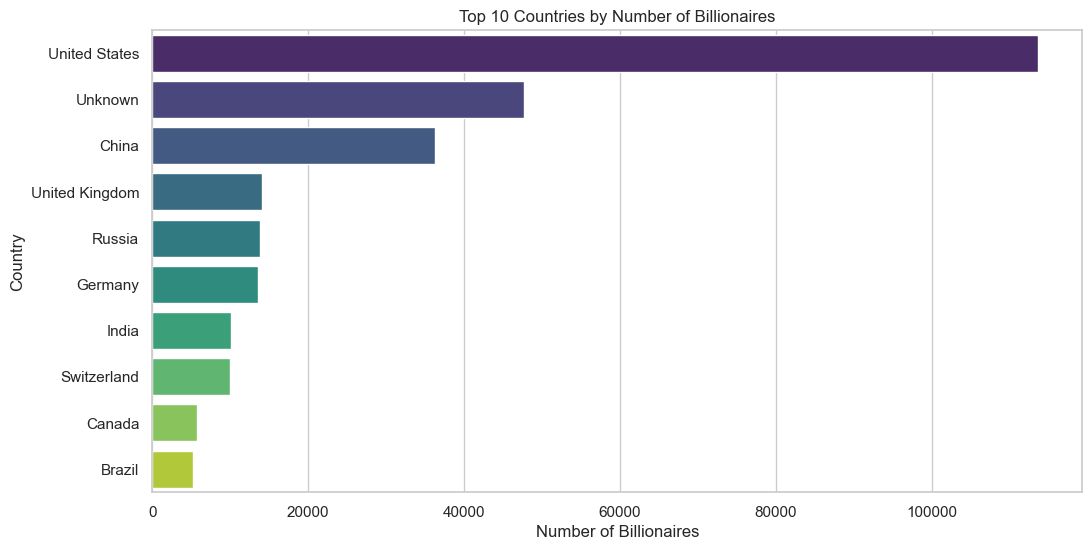

In [26]:
# Geographical Analysis: Global Billionaire Trends**
if 'country' in df_second.columns:
    # Number of billionaires by country
    billionaires_by_country = df_second['country'].value_counts().head(10)

    # Bar chart: Top 10 countries
    plt.figure(figsize=(12, 6))
    sns.barplot(
        x=billionaires_by_country.values,
        y=billionaires_by_country.index,
        palette='viridis'
    )
    plt.title('Top 10 Countries by Number of Billionaires')
    plt.xlabel('Number of Billionaires')
    plt.ylabel('Country')
    plt.show()

C:\Users\milto\AppData\Local\Temp\ipykernel_25632\242014286.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




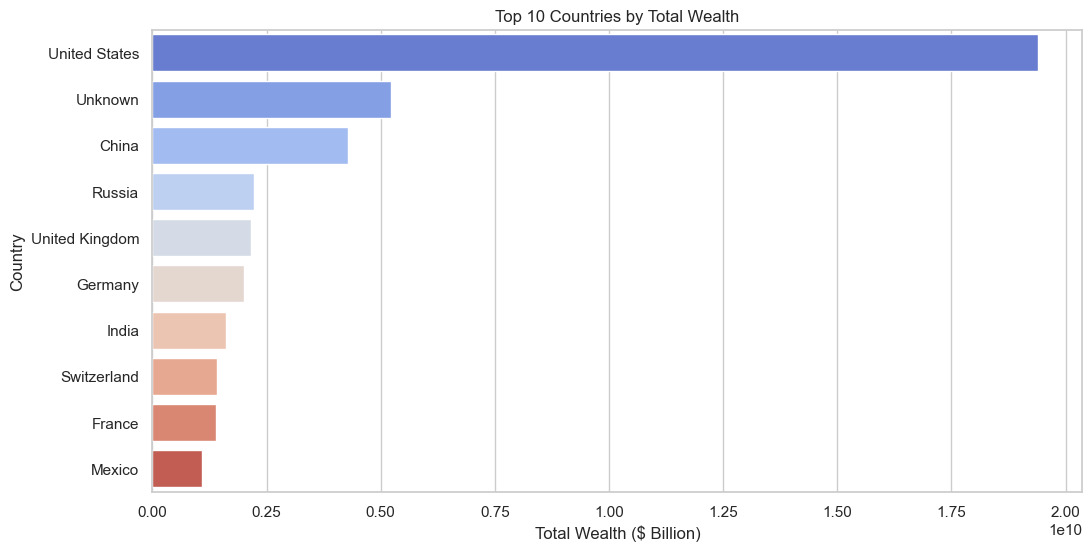

In [27]:
# Wealth Distribution Across Countries**
if 'annual_income' in df_second.columns and 'country' in df_second.columns:
    wealth_by_country = df_second.groupby('country')['annual_income'].sum().sort_values(ascending=False).head(10)

    # Bar chart: Wealth distribution
    plt.figure(figsize=(12, 6))
    sns.barplot(
        x=wealth_by_country.values / 1e3,  # Convert to billion
        y=wealth_by_country.index,
        palette='coolwarm'
    )
    plt.title('Top 10 Countries by Total Wealth')
    plt.xlabel('Total Wealth ($ Billion)')
    plt.ylabel('Country')
    plt.show()


The end.